# Sarcasm Headlines Classification Project

In [1]:
import json
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models,optimizers
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
path="E:/Study DATA/Deep learning Projects/Sarcasm Headlines Classification Project/Dataset/Sarcasm_Headlines_Dataset_v2.json"
data=[json.loads(line) for line in open(path,"r")]

In [3]:
print(data[0])
print("Total Number of Records: ",len(data))

{'is_sarcastic': 1, 'headline': 'thirtysomething scientists unveil doomsday clock of hair loss', 'article_link': 'https://www.theonion.com/thirtysomething-scientists-unveil-doomsday-clock-of-hai-1819586205'}
Total Number of Records:  28619


In [4]:
# Initialize the lists
sentences = []
labels = []

# Collect sentences and labels into the lists
for item in data:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])
    
print("Total Number of Headline: ",len(sentences))
print("Total Number of Labels: ",len(labels))

Total Number of Headline:  28619
Total Number of Labels:  28619


## Hyperparameters

We placed the hyperparameters in the cell below so we can easily tweak it later:

In [5]:
# Number of examples to use for training
training_size = 22000

# Vocabulary size of the tokenizer
vocab_size = 12000

# Maximum length of the padded sequences
max_length = 30

# Output dimensions of the Embedding layer
embedding_dim = 16

## Split the dataset

Next, we will generate train and test datasets. we will use the `training_size` value we set above to slice the `sentences` and `labels` lists into two sublists: one fore training and another for testing.

In [6]:
# Split the sentences
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]

# Split the labels
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

## Preprocessing the train and test sets

Now we can preprocess the text and labels so it can be consumed by the model. we use the `Tokenizer` class to create the vocabulary and the `pad_sequences` method to generate padded token sequences. we will also need to set the labels to a numpy array so it can be a valid data type for `model.fit()`.

In [7]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Parameters for padding and OOV tokens
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

# Initialize the Tokenizer class
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)

# Generate the word index dictionary
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

# Generate and pad the training sequences
training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# Generate and pad the testing sequences
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# Convert the labels lists into numpy arrays
training_labels = np.array(training_labels)
testing_labels = np.array(testing_labels)

## Build and Compile the Model

Next, we will build the model.

we will use GlobalAveragePooling1D instead of flatten. this added computation reduces the dimensionality of the model as compared to using `Flatten()` and thus, the number of training parameters will also decrease.

In [8]:
# Build the model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(layers.LSTM(16)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 30, 16)            192000    
                                                                 
 bidirectional (Bidirectiona  (None, 32)               4224      
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 196,257
Trainable params: 196,257
Non-trainable params: 0
_________________________________________________________________


You will use the same loss, optimizer, and metrics from the previous lab.

In [9]:
# Compile the model
model.compile(loss='binary_crossentropy',optimizer=optimizers.Adam(learning_rate=0.001),metrics=['accuracy'])

## Train the Model

Now we will feed in the prepared datasets to train the model.

In [10]:
num_epochs = 10

# Train the model
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/10
688/688 - 105s - loss: 0.4477 - accuracy: 0.7815 - val_loss: 0.3304 - val_accuracy: 0.8553 - 105s/epoch - 153ms/step
Epoch 2/10
688/688 - 22s - loss: 0.2353 - accuracy: 0.9082 - val_loss: 0.3278 - val_accuracy: 0.8592 - 22s/epoch - 31ms/step
Epoch 3/10
688/688 - 19s - loss: 0.1586 - accuracy: 0.9425 - val_loss: 0.3878 - val_accuracy: 0.8473 - 19s/epoch - 28ms/step
Epoch 4/10
688/688 - 19s - loss: 0.1107 - accuracy: 0.9624 - val_loss: 0.4120 - val_accuracy: 0.8459 - 19s/epoch - 28ms/step
Epoch 5/10
688/688 - 22s - loss: 0.0768 - accuracy: 0.9747 - val_loss: 0.5323 - val_accuracy: 0.8383 - 22s/epoch - 32ms/step
Epoch 6/10
688/688 - 22s - loss: 0.0530 - accuracy: 0.9836 - val_loss: 0.6557 - val_accuracy: 0.8365 - 22s/epoch - 32ms/step
Epoch 7/10
688/688 - 34s - loss: 0.0387 - accuracy: 0.9879 - val_loss: 0.7305 - val_accuracy: 0.8377 - 34s/epoch - 49ms/step
Epoch 8/10
688/688 - 30s - loss: 0.0264 - accuracy: 0.9921 - val_loss: 0.8476 - val_accuracy: 0.8296 - 30s/epoch - 43ms/st

## Visualize the Results

we can use the cell below to plot the training results.

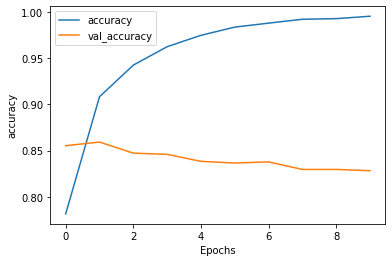

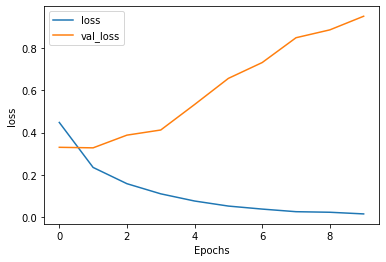

In [11]:
import matplotlib.pyplot as plt

# Plot utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
# Plot the accuracy and loss
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

## Visualize Word Embeddings

In [12]:
# Get the index-word dictionary
reverse_word_index = tokenizer.index_word

# Get the embedding layer from the model (i.e. first layer)
embedding_layer = model.layers[0]

# Get the weights of the embedding layer
embedding_weights = embedding_layer.get_weights()[0]

# Print the shape. Expected is (vocab_size, embedding_dim)
print(embedding_weights.shape) 


(12000, 16)


In [13]:
import io

# Open writeable files
out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')

# Initialize the loop. Start counting at `1` because `0` is just for the padding
for word_num in range(1, vocab_size):

  # Get the word associated at the current index
  word_name = reverse_word_index[word_num]

  # Get the embedding weights associated with the current index
  word_embedding = embedding_weights[word_num]

  # Write the word name
  out_m.write(word_name + "\n")

  # Write the word embedding
  out_v.write('\t'.join([str(x) for x in word_embedding]) + "\n")

# Close the files
out_v.close()
out_m.close()

In [14]:
# Import files utilities in Colab
try:
  from google.colab import files
except ImportError:
  pass

# Download the files
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')